<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    Solar Power Generation Prediction & Fault/Abnormalities Analysis
</h1>

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:35px; color:#e90045"> PV Solar Power Plant: </h1>

Photo Voltaic Solar Power has emerged as the best source of green energy in recent past in a country like India which gets a good amount of solar insolation. With the continuous development of efficient PV modules, Battery storage and Smart Grid etc. Power Generation through PV Solar Plant has gained the momentum further and has a very promising future.


The solar power plant is also known as the Photovoltaic (PV) power plant. It is a large-scale PV plant designed to produce bulk electrical power from solar radiation. The solar power plant uses solar energy to produce electrical power. Therefore, it is a conventional power plant.Solar energy can be used directly to produce electrical energy using solar PV panels.Hence, to produce electrical power on a large scale, solar PV panels are used. Below is the layout plan of photovoltaic power plant.

<img src="https://gec.jp/jcm/en/wp-content/uploads/2018/07/ba5ce1cae920df16aecff92a5667d64c.png" alt="Solar Panel" width="90%">
</center>

The above picture shows a typical structure of a solar power plant. Sunlight falls on PV modules, generates DC Power which is fed to the Inverters (through some Junction Box and String Monitoring Box), Inverters convert DC Power to AC Power, AC Power is stepped up through Transformers to match Grid Voltage and finally fed to the Grid through some Switchgear.

</center><img src="https://gumlet.assettype.com/iglobalnews%2Fimport%2F2018%2F05%2FVikram_Solar_40_MW.jpg?auto=format%2Ccompress&format=webp&w=768&dpr=1.0" alt="Solar Panel" width="100%">
</center>

<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    Challanges with PV Solar Power Generation: 
</h1>

1. Unlike conventional coal or gas based power plants, Solar Power Plants output are available during day time only and highly variable depending upon the availability of Sunlight.</b>

2. Power generated has to be consumed instantly in the absence of a power storage (Battery storage is still emerging)

3. Spread over a large area, should be shadow free.

4. Regular cleaning of PV modules and physical fault detection in the field side.

<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    Data Description
</h1>

We have at hand solar power generation data and weather data of a solar plower plants. Let's explore the given data, draw some insights, try to meet our challenges and predict/forecast the plant output to the extent possible which can be used for a better Grid Management/Stability.

Plant_2_Generation_Data.csv :  In this data set - DATE_TIME, PLANT_ID, DC_Power, AC_POWER, DAILY_YIELD, TOTAL_YIELD are given

Plant_2_Weather_Sensor_Data.csv : In this data set - DATE_TIME, PLANT_ID, SOURCE_KEY, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION are given

<font color="Blue" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">Solar radiation terminology : </font>
    
Peak sun hours (PSH): Daily irradiation is commonly referred to as daily PSH (or full sun hours). The number of PSH for the day is the number of hours for which power at the rate of 1kW/m2 would give an equivalent amount of energy to the total energy for that day. The terms peak sunlight hours and peak sunshine hours may also be used. Irradiation: The total quantity of radiant solar energy per unit area received over a given period, e.g. daily, monthly or annually. Insolation: Another term for irradiation. The amount of solar radiation, incident on the surface over a period of time, Peak sun hours (kWh/m2/ day) are a measurement of daily insolation. Irradiance: The solar radiation incident on a surface at any particular point in time measured in W/m2.

</center><img src="https://www.researchgate.net/publication/342730855/figure/fig3/AS:910476217180160@1594085854156/Solar-radiation-intensity-during-the-three-typical-days.ppm" alt="Solar Panel" width="80%">
</center>


**Example**
> If sunlight is received at an irradiance of 1000W/m2 for 2 hours, 600W/m2 for 1.5 hours and 200W/m2 for 1 hour, the total radiation received that day is 3.1PSH:

> 1000W/m2 × 2 hours + 600W/m2 × 1.5 hours + 200W/m2 × 1 hour = 3100W/m2/day

> 3100W/m2/day ÷ 1000W/m2/day = 3.1PSH

<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    1. Importing Libraries
</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('precision',3)

<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    2. Importing Power Generation & Weather Sensor Data
</h1>

In [3]:
generation_data = pd.read_csv('../input/solar-power/Plant_2_Generation_Data.csv')

In [4]:
weather_data = pd.read_csv('../input/solar-power/Plant_2_Weather_Sensor_Data.csv')

In [5]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

In [6]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    3. Adjust datetime format
</h1>

In [7]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    4. Merging generation data and weather sensor data  
</h1>

In [8]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    5. Adding separate time and date columns  
</h1>

In [9]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0       9425.0    2.429e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0          0.0    1.215e+09   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0               27.005              25.061          0.0  2020-05-15  00:00:00   
1               27.005              25.061          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  
0   15      5    20     0        0                   0  2020-05-15  
1   15      5    20     0        0                   0  2020-05-15

In [10]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

In [11]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

<code style="background:yellow;color:red">There is no Missing Values in the dataset </code>

In [12]:
df_solar.describe().style.background_gradient(cmap='rainbow')

<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    6. Converting 'SOURCE_KEY' from categorical form to numerical form
</h1>

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0     9425.000    2.429e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0        0.000    1.215e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0     3075.333    2.248e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0      269.933    1.704e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0     3177.000    1.994e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0               27.005              25.061          0.0  2020-05-15  00:00:00   
1               27.005              25.061          0.0  2020-05-15  00:00:00   
2               27.005              25.061          0.0  2020-05-15  00:00:00   
3               27.005              25.061          0.0  2020-05-15  00:00:00   
4               27.005              25.061          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  \
0   15      5    20     0        0                   0  2020-05-15   
1   15      5    20     0        0                   0  2020-05-15   
2   15      5    20     0        0                   0  2020-05-15   
3   15      5    20     0        0                   0  2020-05-15   
4   15      5    20     0        0                   0  2020-05-15   

   SOURCE_KEY_NUMBER  
0                  0  
1                  1  
2                  2  
3                  3  
4                  4

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:35px; color:#e90045">Data Visualization: </h1>

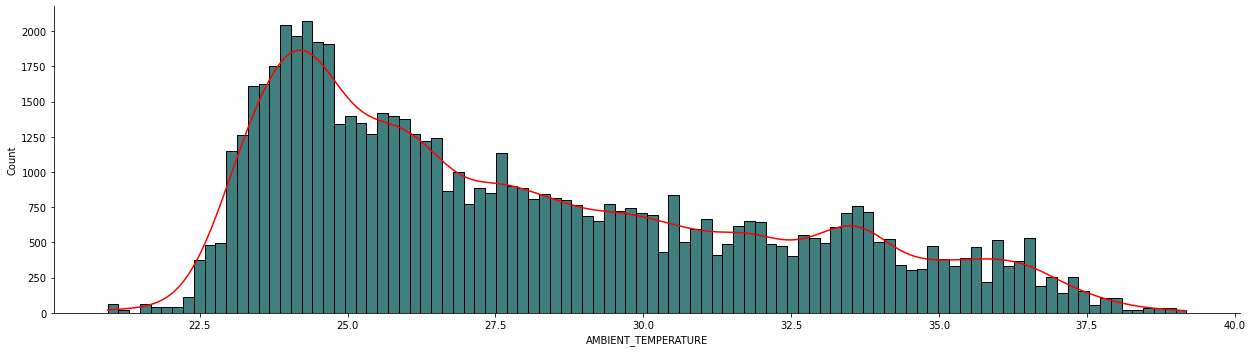

In [14]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [15]:
df_solar['DATE'].nunique()

34

The data of solar power generation is of 34 days

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:#e90045">Faults & Abnormalities detection in solar power plant generation </h1>

<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    7. Multiple Plotting of DC_POWER generation on per day basis.
</h1>

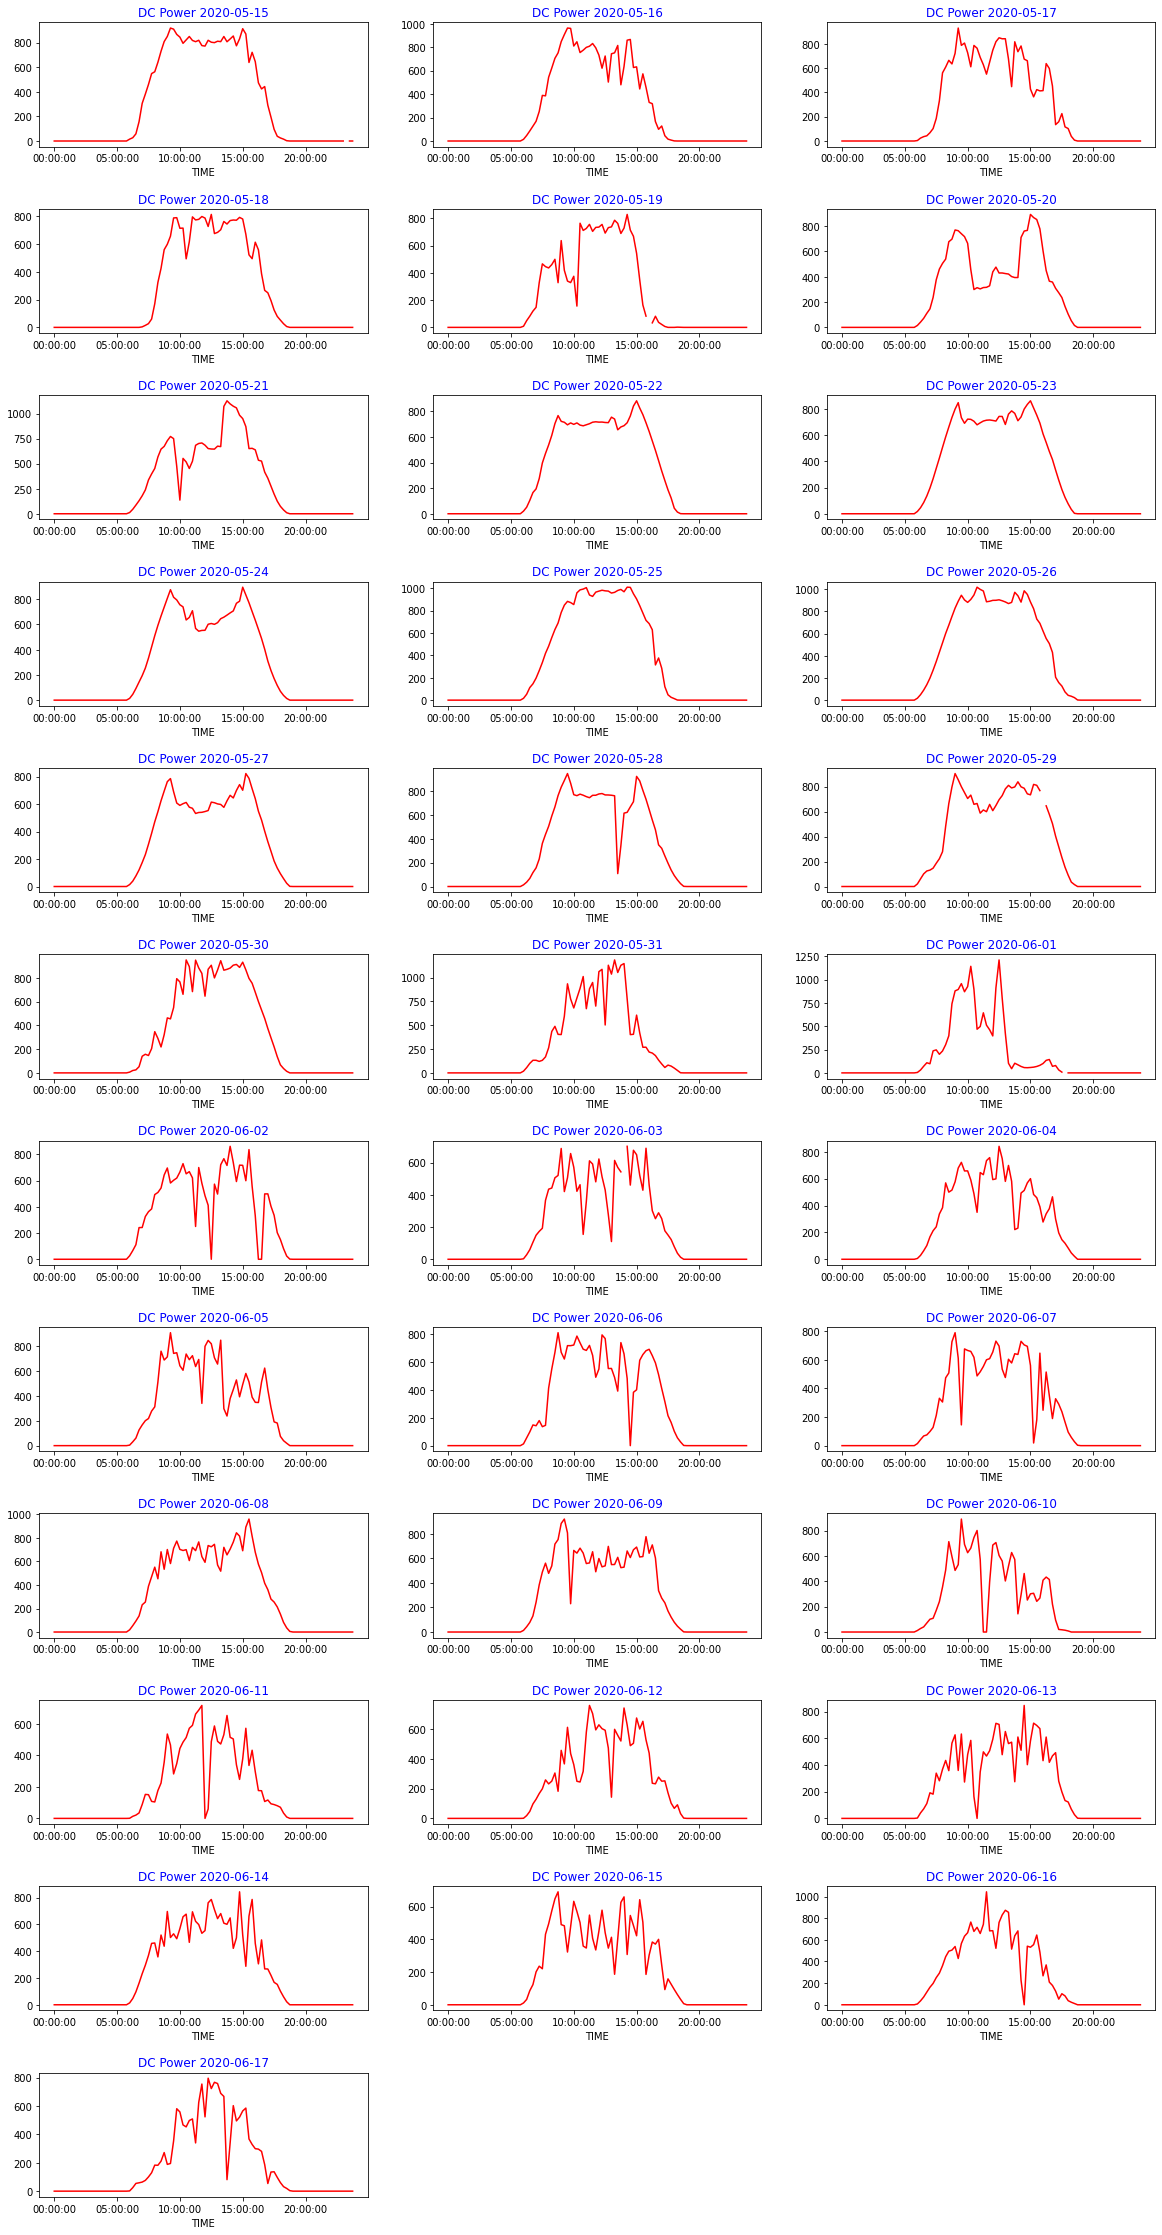

In [16]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc, row=12, col=3)

<span class="label label-default" style="background-color:pink; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:Red; ">Ideal Graph of Solar Power Generation 📊📈</span>

<img src="https://www.solarmarket.com.au/wp-content/uploads/2021/04/solar-output-graph.png" alt="Solar Panel" width="50%">
</center>

> The reason we get this shape is based on the angle of the sun to your panels. In the early morning, when the sun is still rising, it’s essentially at its lowest point in the sky. In order for the sunlight to reach your panels at this time of the day, it has to cut through the most amount of atmosphere. This is important to note, because energy from the sun is absorbed when it travels through the atmosphere. So, this means that the more atmosphere it travels through, the more energy is absorbed and the less that is available for your panels to convert into electricity. At midday, when the sun is directly overhead, sunlight doesn’t need to travel through as much atmosphere. Therefore, your panels will absorb more sunlight during this time.

- In winter, the same concept applies. However, on gloomier winter days there may be less sunlight for your panels to absorb. 
- This can simply be explained by the sun being positioned lower in the sky than it is during summer. 


<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    Abnormalities in DC_POWER Generation
</h1>

**Form the per day DC_POWER generation graph we can find that, most of the days there is a some fluctuation in the power generation.**

*Less Fluctuation in DC_POWER generation is observed in these days.*

> 1. 2020-05-15
> 2. 2020-05-18
> 3. 2020-05-22
> 4. 2020-05-23
> 5. 2020-05-24
> 6. 2020-05-25
> 7. 2020-05-26

*High Fluctuation in DC_POWER generation is observed in these days.*

> 1. 2020-05-19
> 2. 2020-05-28
> 3. 2020-05-29
> 4. 2020-06-02
> 5. 2020-06-03
> 6. 2020-06-04
> 7. 2020-06-13
> 8. 2020-06-14
> 9. 2020-06-17

*Very High Fluctuation & Reduction in DC_POWER generation is observed in these days.*

> 1. 2020-06-03
> 2. 2020-06-11
> 3. 2020-06-12
> 4. 2020-06-15

**Note: Reason for very high Fluctuation & Reduction in DC_POWER generation is due to fault in the system or may be fluctuation in weather or due to clouds etc. which need to be analyse further**

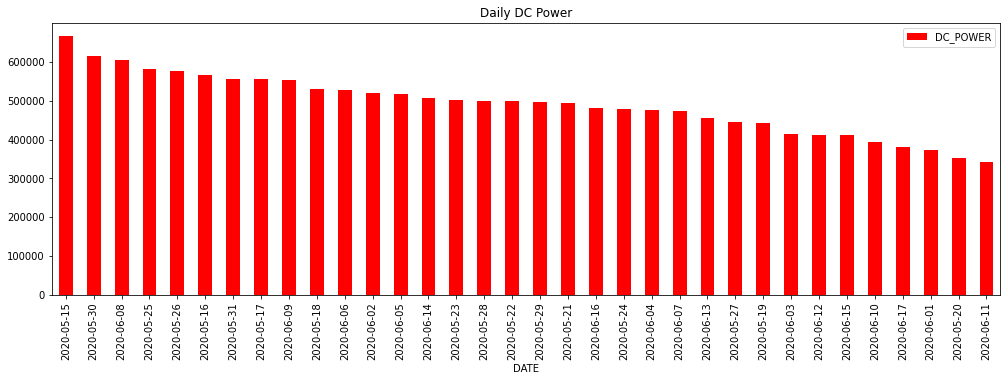

In [17]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()



**Form the per day DC_POWER generation graph we can find the average power generation per day.**

> *Highest average DC_POWER Generation is on*: **2020-05-15**

> *Lowest average DC_POWER Generation is on* : **2020-06-11**

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        NOTE: This Large variation in the DC_POWER generation is due to the fault in the system or due to weather change, which needs to study further. But from this bar plot we find the day on which there is highest DC_POWER is generated and the day with the lowest DC_POWER generated.
    </p>
</div>

<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    8. Multiple Plotting of IRRADIATION generation on per day basis.
</h1>

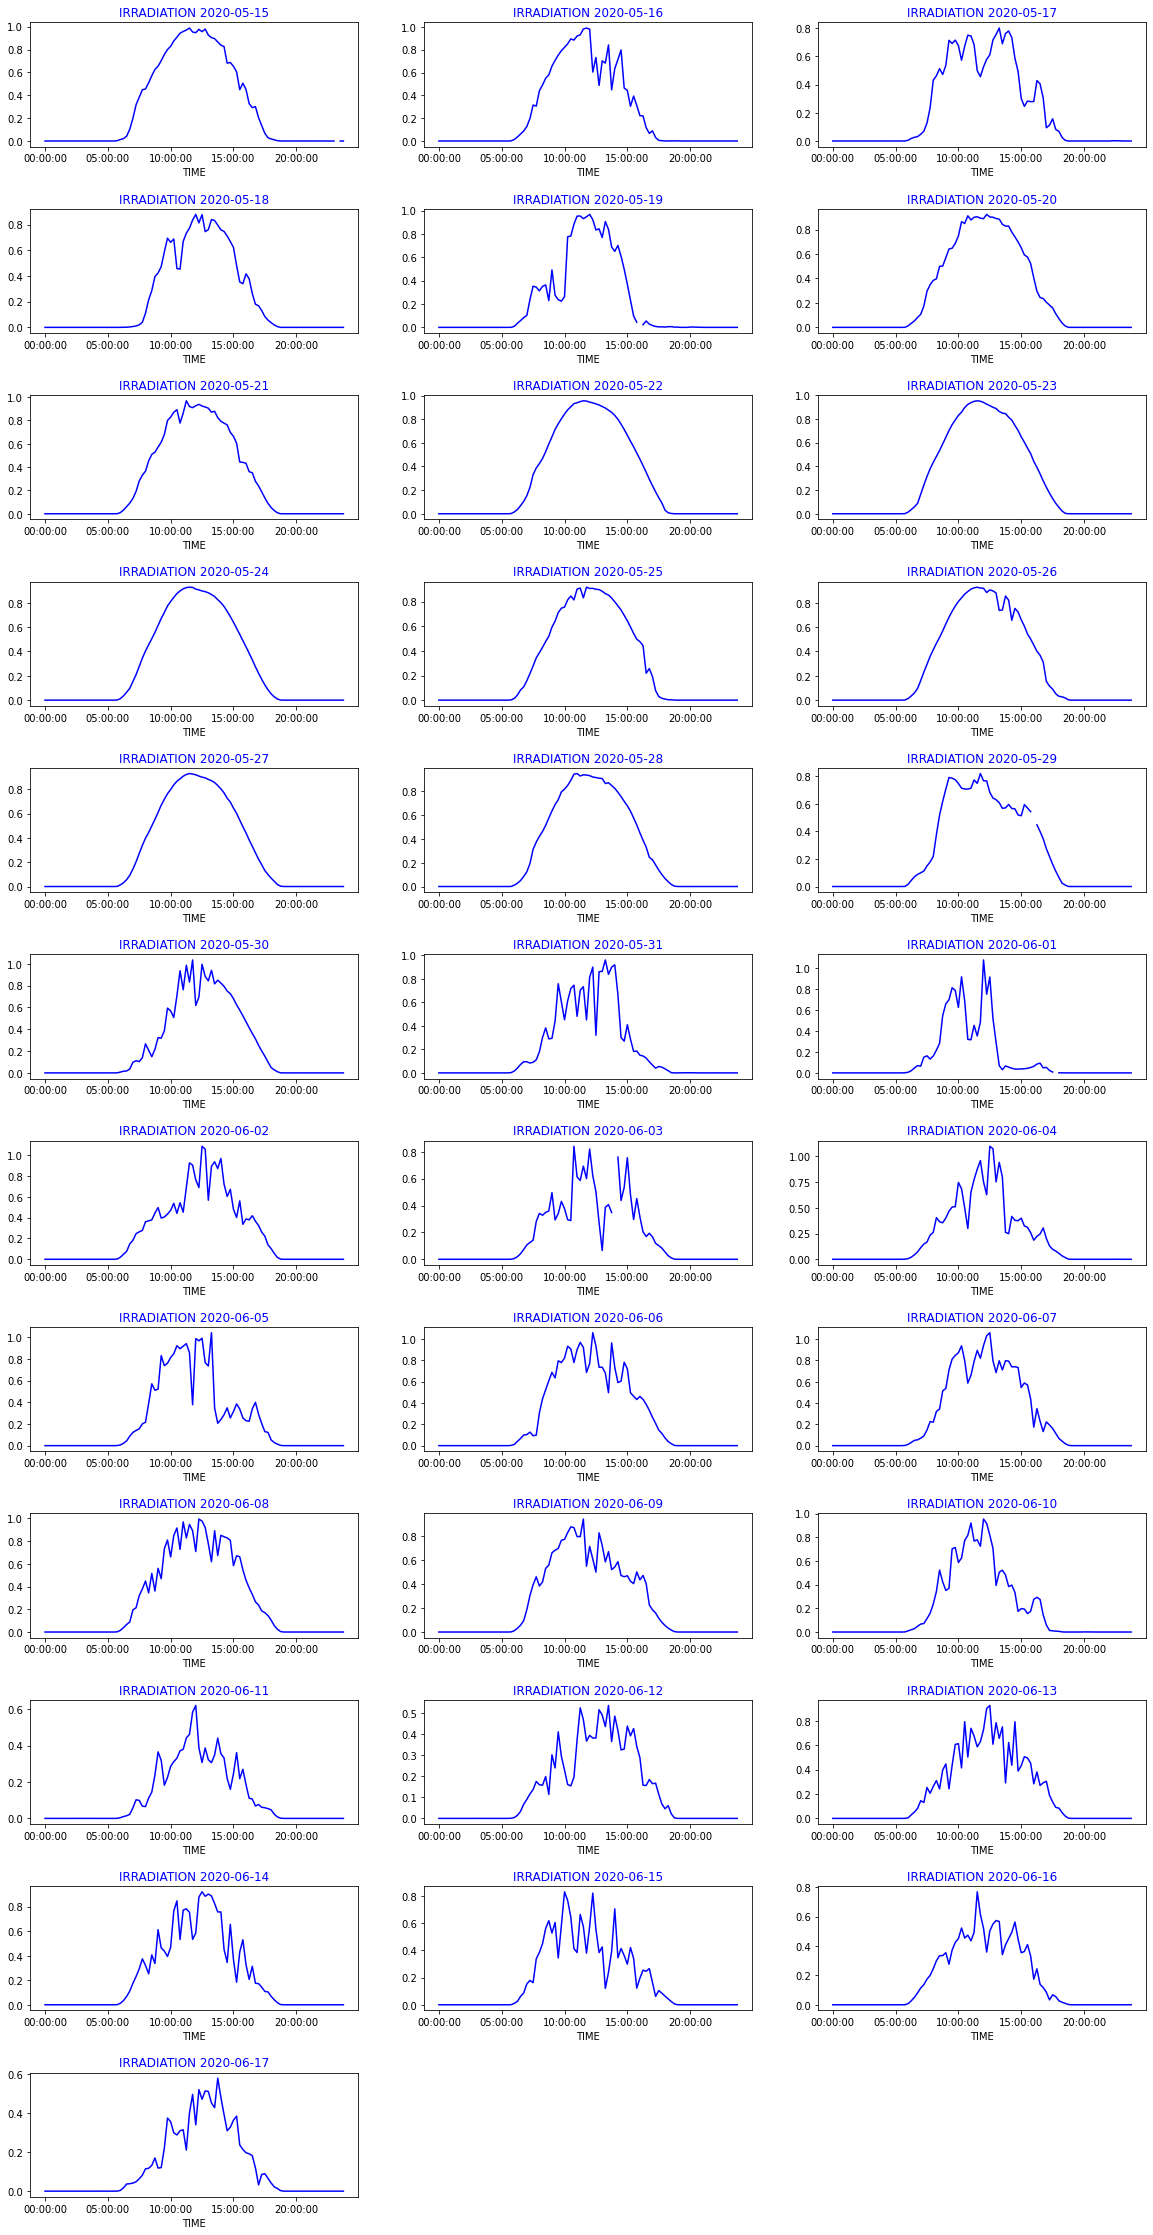

In [18]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)



**IRRADIATION graph pattern is looking very similar to the corresponding DC_POWER generation on per day basis.** 

- In solar power plant DC_POWER or Output power is mostly depends on IRRADIATION .Or it is not wrong to say that it’s directly proportional.

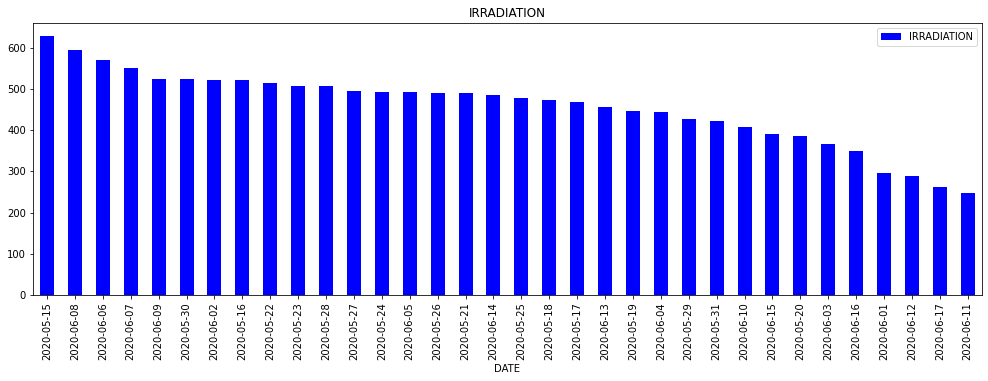

In [19]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

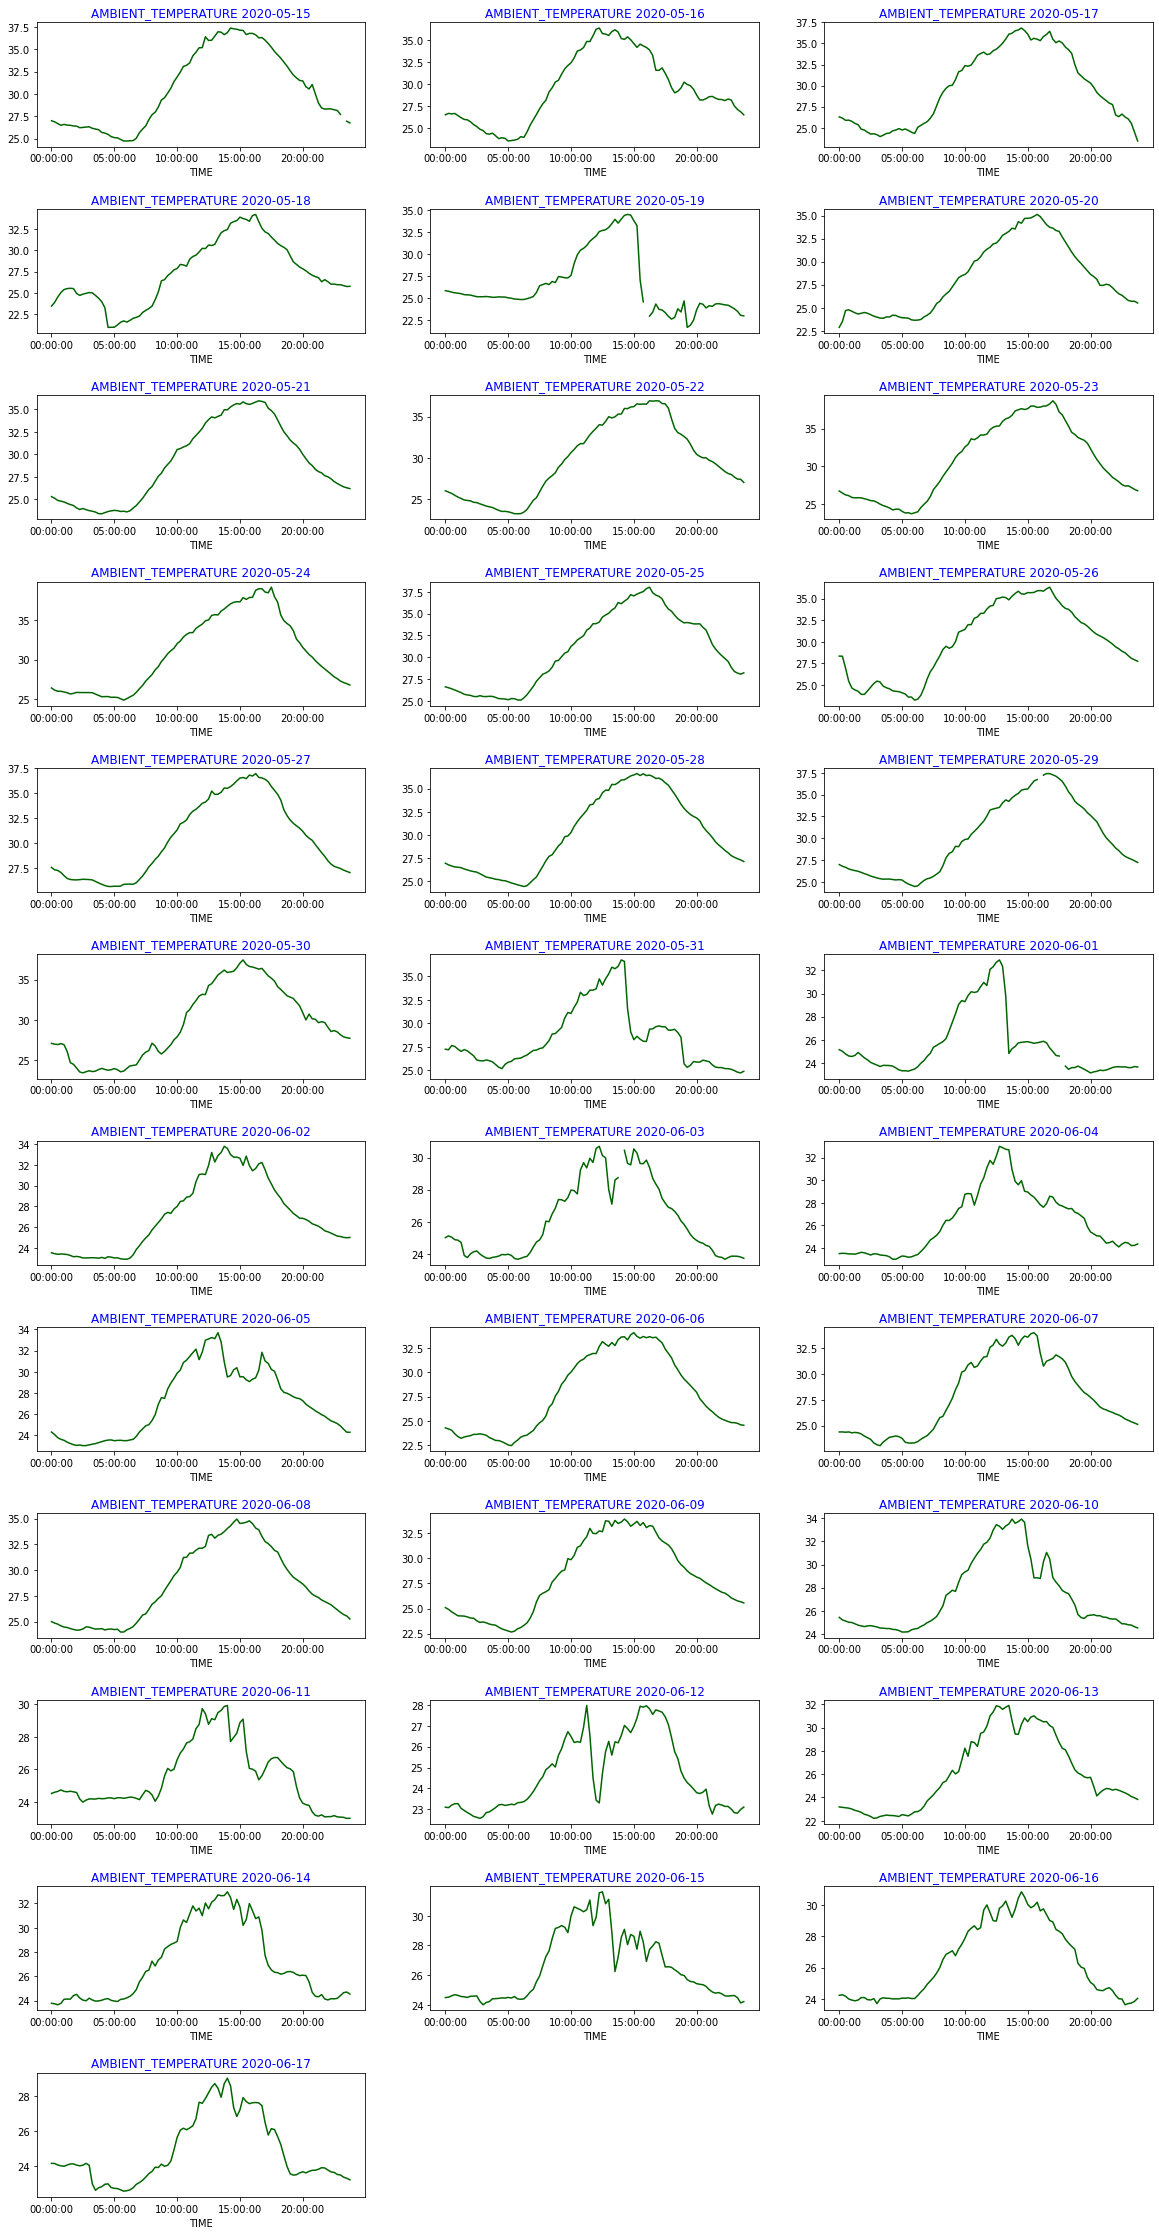

In [20]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

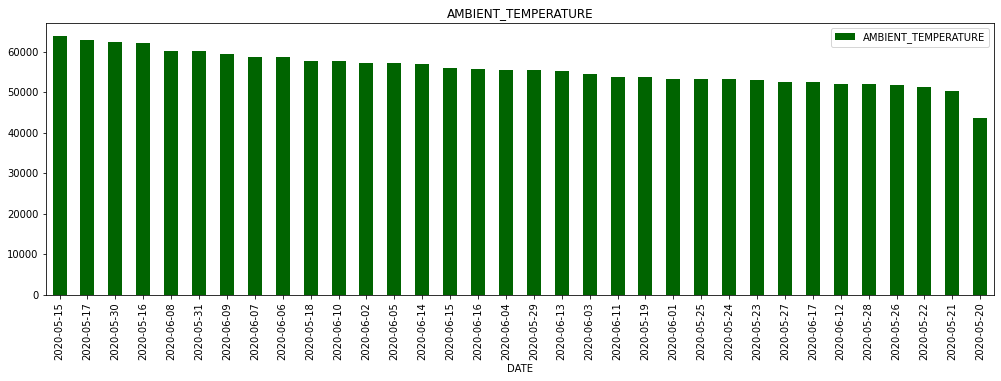

In [21]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:35px; color:#e90045">Best and Worst Power generation comparision: </h1>

<span class="label label-default" style="background-color:pink; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:Red; ">Major Environmental Factors affecting the of solar power generation are.</span>

> 1. The thickness of clouds is also a factor in how much sunlight your solar panels can soak up. We may see thicker clouds in winter too and this is something else to look out for. It’s hard for sunlight to travel through thick clouds, which will affect your solar power system’s output. 
> 2. While we’ve looked at the sun’s positioning and how it can affect output, there’s another factor to consider when your system may not be performing at its maximum… even at midday.
> 3. Solar panel temperature is the number one reason behind your solar power system not achieving peak performance
> 4. Solar power generation is directly depends on Irradiation comming from the sun.

<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    9. Highest average DC_POWER is generated on "2020-05-15" 
</h1>

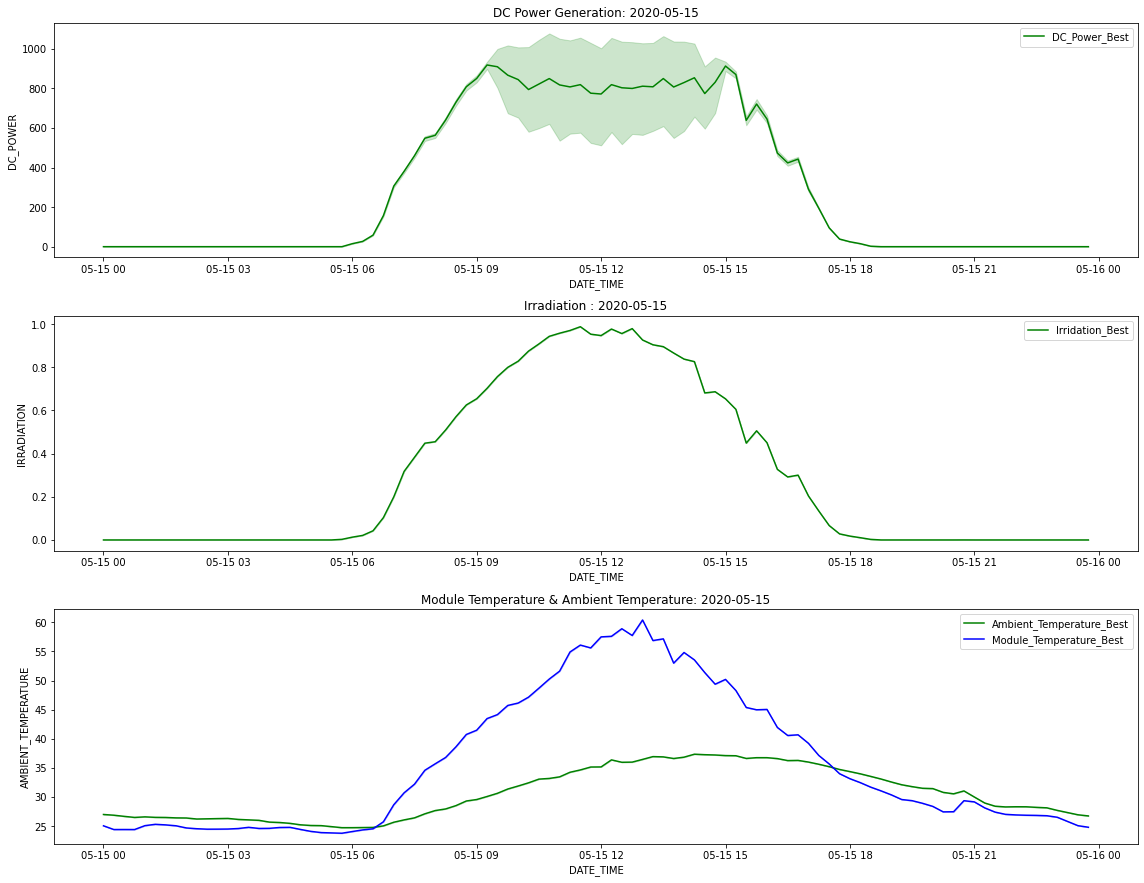

In [22]:
plt.figure(figsize=(16,16))

date=["2020-05-15"]

plt.subplot(411)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best",color='green');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Best",color='green');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best",color='green');
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        NOTE: Both DC_POWER graph and IRRADIATION graph is almost looking like an ideal graph which is explained earlier. Weather is also looking good, and there is no cloud is in the sky because there is very less variation in IRRADIATION and temperature of the solar panel and ambient temperature.
    </p>
</div>


<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    10. Lowest average DC_POWER is generated on "2020-06-11"  
</h1>

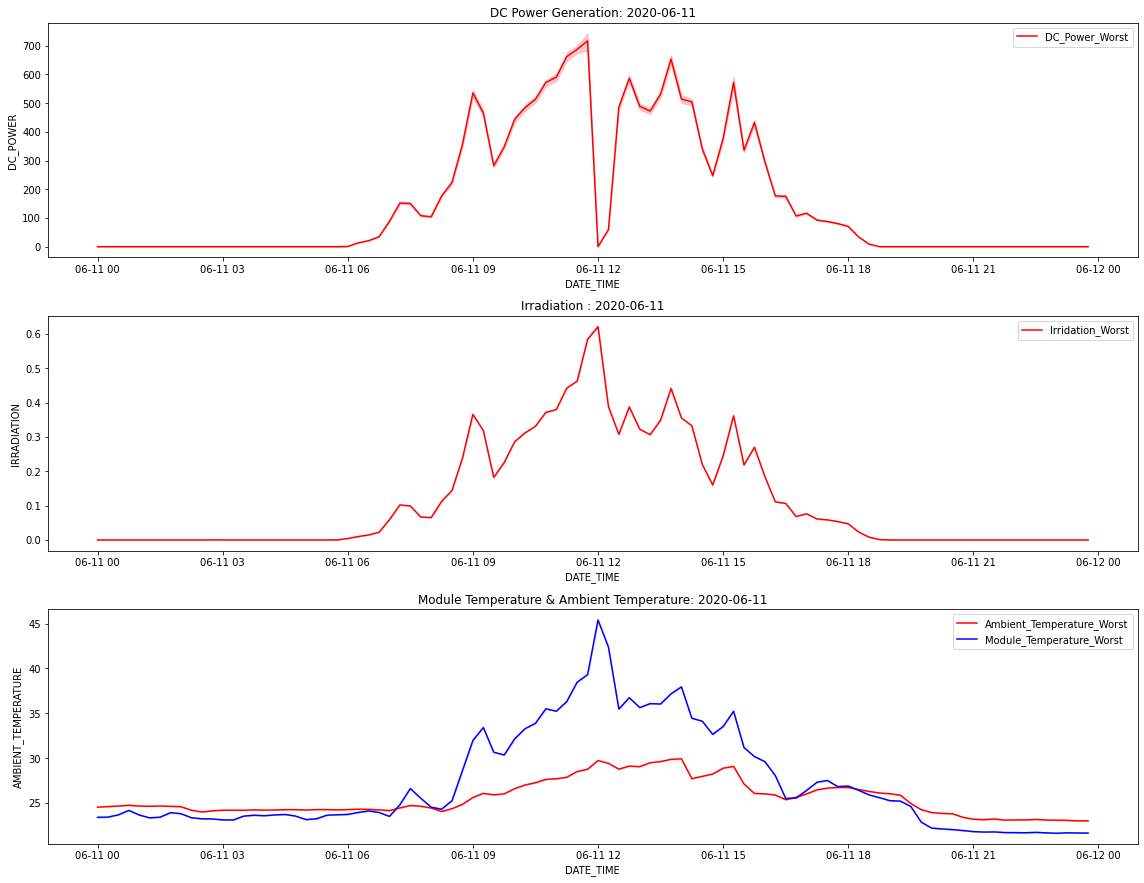

In [23]:
date=["2020-06-11"]
plt.figure(figsize=(16,16))

plt.subplot(411)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Worst",color='red');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Worst",color='red');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Worst",color='red');
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Worst",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        NOTE: There are very large fluctuations in both DC_POWER graph and IRRADIATION graph
    </p>
</div>


**Possible Reasons for these large fluctuation in the DC_POWER, IRRADIATION, Ambient temperature, Module temperature:**

> At about 12 O’clock there is a sharp decline in the DC_POWER generation from 700 to almost 20 KWatt. 

> And at the same time IRRADIATION fall from 0.6 to 0.3 almost half.

> Ambient temperature and Module temperature also fall drastically. Module temperature from 45 C to 35 C & Ambient temperature is also reduced. 

The possible reason for this reduction is due to may be heavy rain and heavily clouded sky and bad weather. There is almost very less possibility of any fault in the system 

In [24]:
#sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:#e90045">Solar Power Plant Inverter Efficiency Calculation </h1>

In [25]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [26]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [27]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [28]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

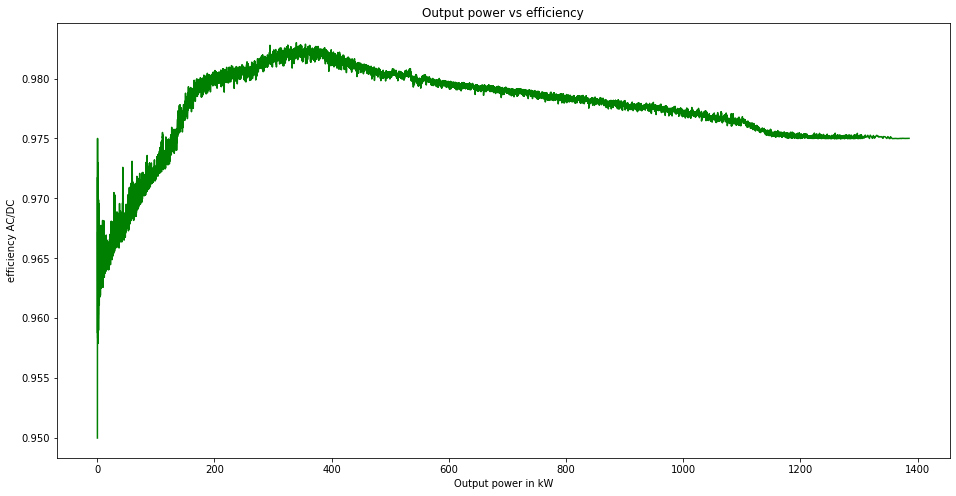

In [29]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    11. What does inverter efficiency mean?
</h1>

- In fact, we shall discuss here the general power inverter efficiency whether it’s solar inverter or pure sine wave inverter or even modified sine wave inverter.

- The inverter efficiency refers to how much dc power will be converted to ac power, as some of power will be lost during this transition in two forms:

*Heat loss.*
- Stand-by power which consumed just to keep the inverter in power mode. Also, we can refer to it as inverter power consumption at no load condition.

- Hence, inverter efficiency = pac/pdc where pac refers to ac output power in watt and pdc refers to dc input power in watts.

<img src="https://www.inverter.com/images/uploaded/inverter-output-power-efficiency-diagram.jpg" alt="Solar Panel" width="90%">

For the two basic inverters types in the market, the typical efficiency of high-quality pure sine wave inverter varied from 90% to 95% and for low quality modified sine wave inverter, it varied from 75% to 85%.

This power inverter efficiency value depends on inverter load power capacity variation, as the efficiency increases and may reach to its max value at higher load power capacity in compare to lower loading power capacity, and in condition that not going above inverter output power capacity limit. Generally, below 15% inverter loading, the efficiency will be quite low. Consequently, good matching between inverter capacity and its load capacity will enable us harvest larger efficiency, which means larger inverter ac output power for the same dc input power.

[REFERENCE: ](https://www.inverter.com/what-is-inverter-efficiency)

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:#e90045">Solar Power Prediction</h1>

In [30]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [31]:
X.head()

DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0     9425.000    2.429e+06               27.005              25.061   
1        0.000    1.215e+09               27.005              25.061   
2     3075.333    2.248e+09               27.005              25.061   
3      269.933    1.704e+06               27.005              25.061   
4     3177.000    1.994e+07               27.005              25.061   

   IRRADIATION  DC_POWER  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0

In [32]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    1. LinearRegression
</h1>

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    2. RandomForestRegressor
</h1>

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    3. DecisionTreeRegressor
</h1>

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = rfr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %



<h1 style="
    background: linear-gradient(90deg, #FF512F, #DD2476);
    color: white;
    text-align: center;
    padding: 20px 15px;
    border-radius: 12px;
    box-shadow: 0 5px 10px rgba(0, 0, 0, 0.3);
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 30px;
    letter-spacing: 1px;
">
    12. Result Prediction
</h1>

In [38]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.72880952 ...    0.         1007.10763333
    0.        ]


In [39]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

Actual  Predicted
40426    0.000      0.000
50974    0.000      0.000
53919  684.913    684.729
2384     0.000      0.000
22014    0.000      0.000

In [40]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

Actual  Predicted  Error
40426    0.000      0.000  0.000
50974    0.000      0.000  0.000
53919  684.913    684.729  0.185
2384     0.000      0.000  0.000
22014    0.000      0.000  0.000

In [41]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

# Exploratory Data Analysis:

In [42]:
generation_data = pd.read_csv('../input/solar-power/Plant_2_Generation_Data.csv')
weather_data = pd.read_csv('../input/solar-power/Plant_2_Weather_Sensor_Data.csv')

generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')
df = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0     9425.000    2.429e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0        0.000    1.215e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0     3075.333    2.248e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0      269.933    1.704e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0     3177.000    1.994e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0               27.005              25.061          0.0  
1               27.005              25.061          0.0  
2               27.005              25.061          0.0  
3               27.005              25.061          0.0  
4               27.005              25.061          0.0

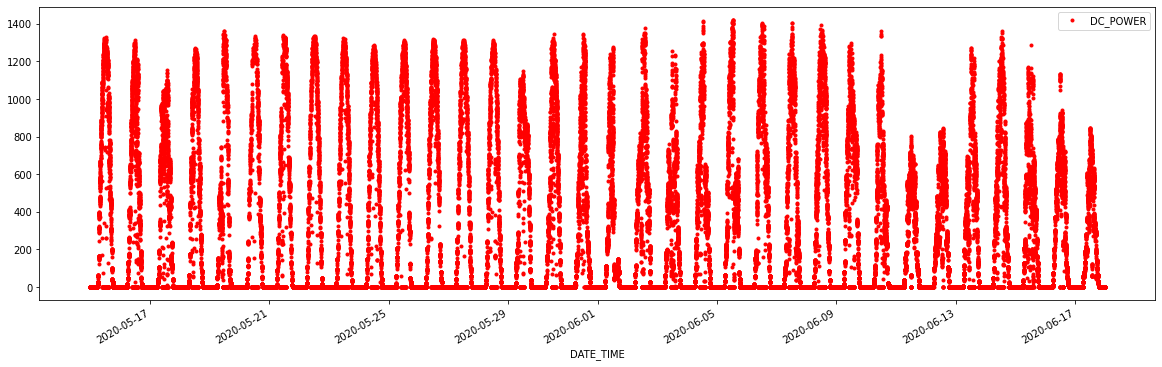

In [43]:
df.plot(x= 'DATE_TIME', y='DC_POWER', style='.', figsize = (20, 6),color= "red");

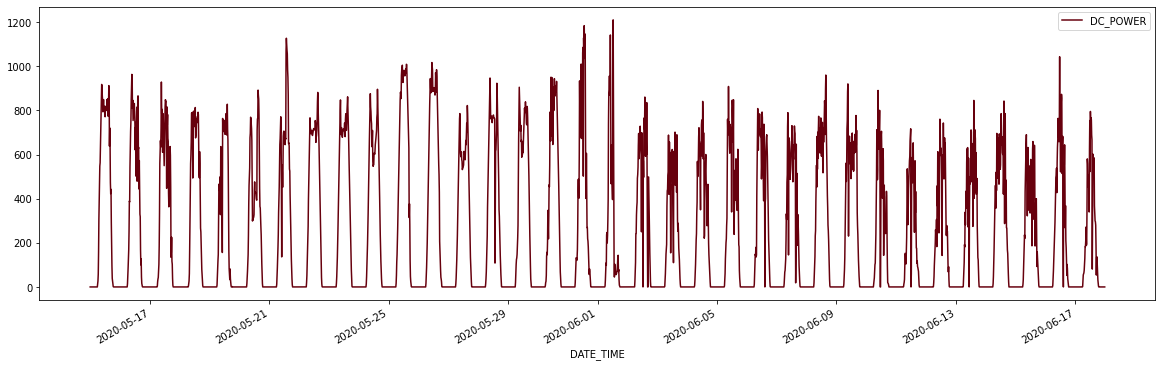

In [44]:
df.groupby('DATE_TIME')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r',figsize = (20, 6));

In [45]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot

data = go.Bar(x = df.groupby('SOURCE_KEY').agg({'TOTAL_YIELD':'mean'}). \
              reset_index()['SOURCE_KEY'],
              y = df.groupby('SOURCE_KEY').agg({'TOTAL_YIELD':'mean'}). \
              reset_index()['TOTAL_YIELD'],
              width=[0.5, 0.5],
              text =round(df.groupby('SOURCE_KEY').agg({'TOTAL_YIELD':'mean'}).reset_index()['TOTAL_YIELD'],2),
              textposition= 'outside',
              textfont = dict(size = 26,
                             color = 'deeppink'),
              marker = dict(color = 'pink',
                            line_color = 'deeppink',
                            line_width = 3,
                            opacity = 0.65))

layout = go.Layout(title = {'text': "Avg TOTAL_YIELD by SOURCE_KEY",
                           'y':1.0,
                           'x':0.5,
                           'xanchor': 'center',
                           'yanchor': 'top'},
                   xaxis = dict(title = 'SOURCE_KEY'),
                   yaxis =dict(title = 'TOTAL_YIELD'),
                   width = 1400,
                   height = 700,
                   template = 'simple_white')

fig=go.Figure(data = data, layout = layout)
iplot(fig)

In [46]:
import plotly.express as px
fig = px.sunburst(df, path=['SOURCE_KEY'], values='DAILY_YIELD',color='MODULE_TEMPERATURE')
fig.update_layout (height = 800 , width = 800)
fig.show()

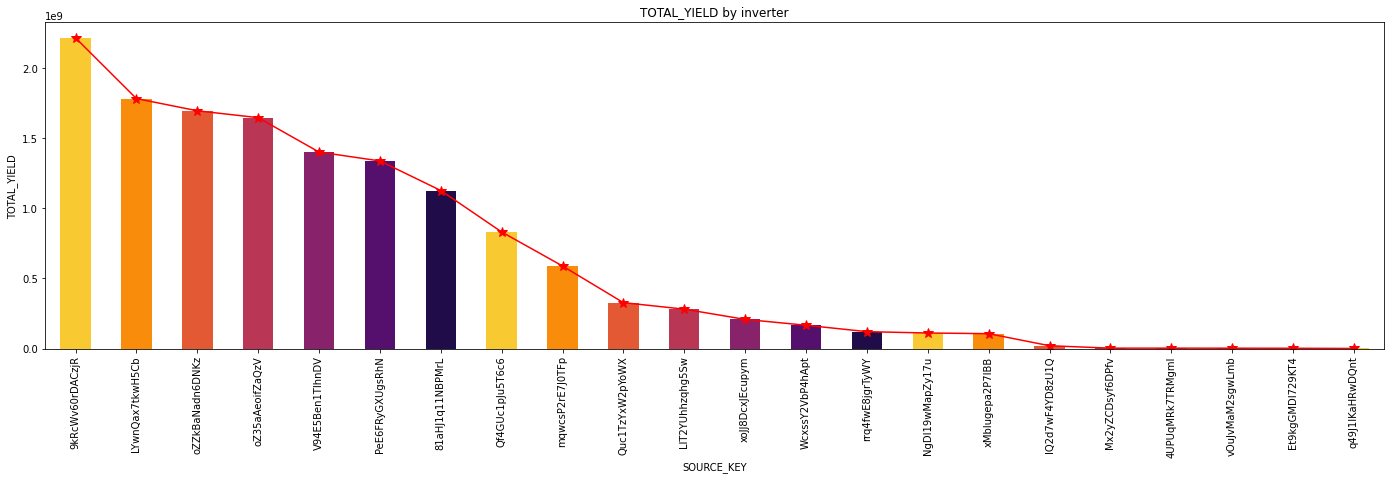

In [47]:
plt.figure(figsize=(24,6))
plt.title('TOTAL_YIELD by inverter')
plt.ylabel('TOTAL_YIELD')
df.groupby('SOURCE_KEY')['TOTAL_YIELD'].mean().sort_values(ascending=False).plot(kind='line', marker='*', color='red', ms=10)
df.groupby('SOURCE_KEY')['TOTAL_YIELD'].mean().sort_values(ascending=False).plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

In [48]:
import plotly.graph_objects as go
import plotly.express as px

labels = df['SOURCE_KEY']
values =df['TOTAL_YIELD']
fig = go.Figure(data = [go.Pie(labels = labels , values = values , 
         textinfo = 'label+percent' , hole =0.3, pull = [.1, 0, 0, 0])])
fig.show()

In [49]:
import plotly.express as px
import plotly.graph_objs as go

fig = px.scatter(df, x = 'DAILY_YIELD', y = 'IRRADIATION', log_x=True,
                 hover_name="SOURCE_KEY", hover_data=["DAILY_YIELD", "IRRADIATION"],
                color = 'DAILY_YIELD', color_continuous_scale= 'rainbow',
                title = 'Quality or Quantity, That\'s the question')
fig.show()

In [50]:
import plotly.express as px
import plotly.graph_objs as go

dfpie = df.loc[df.groupby('SOURCE_KEY')['AMBIENT_TEMPERATURE'].idxmax()]
fig = px.bar(dfpie, x = 'SOURCE_KEY', y = 'AMBIENT_TEMPERATURE',
            text = 'SOURCE_KEY', color = 'DAILY_YIELD',
            title = 'Max AMBIENT_TEMPERATURE')
fig.show()

In [51]:
df['SOURCE_KEY'].value_counts()

xoJJ8DcxJEcupym    3259
WcxssY2VbP4hApt    3259
9kRcWv60rDACzjR    3259
vOuJvMaM2sgwLmb    3259
rrq4fwE8jgrTyWY    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
q49J1IKaHRwDQnt    3259
oZZkBaNadn6DNKz    3259
PeE6FRyGXUgsRhN    3259
81aHJ1q11NBPMrL    3259
V94E5Ben1TlhnDV    3259
oZ35aAeoifZaQzV    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
Quc1TzYxW2pYoWX    3195
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
Name: SOURCE_KEY, dtype: int64

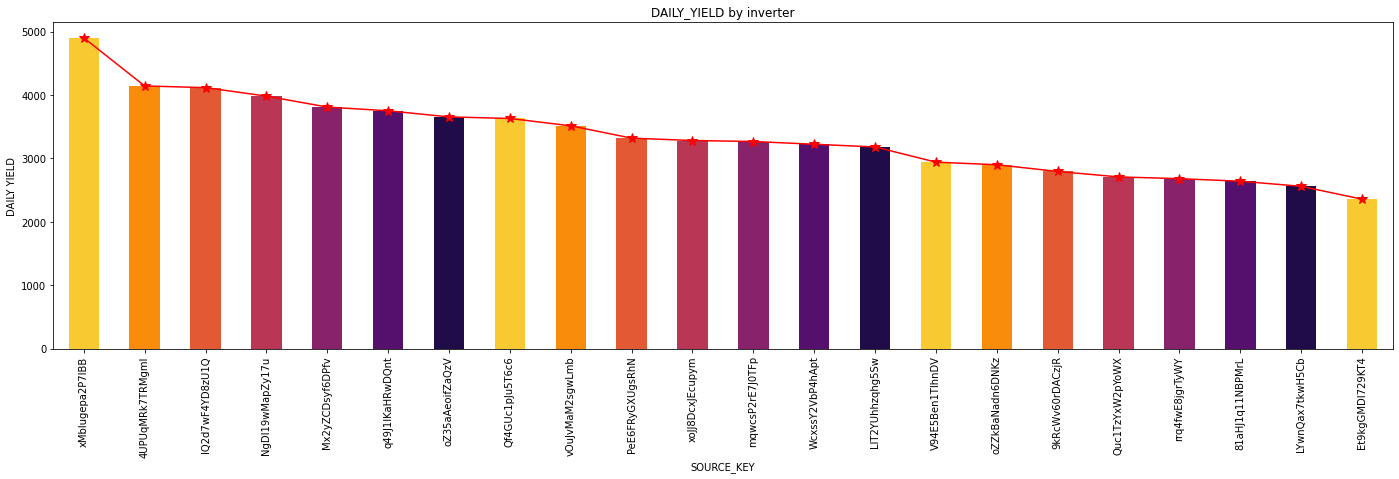

In [52]:
plt.figure(figsize=(24,6))
plt.title('DAILY_YIELD by inverter')
plt.ylabel('DAILY YIELD')
df.groupby('SOURCE_KEY')['DAILY_YIELD'].mean().sort_values(ascending=False).plot(kind='line', marker='*', color='red', ms=10)
df.groupby('SOURCE_KEY')['DAILY_YIELD'].mean().sort_values(ascending=False).plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

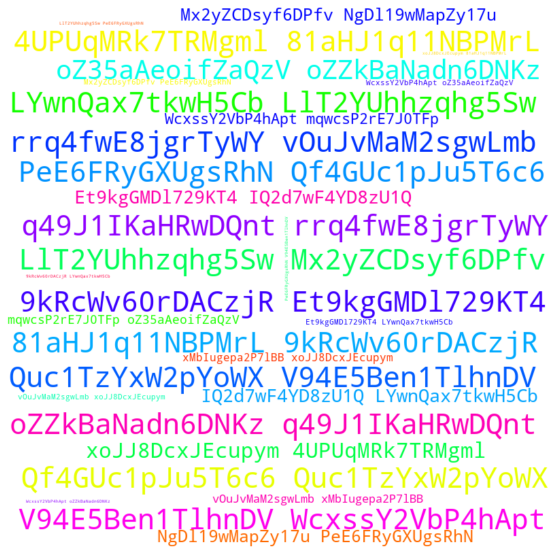

In [53]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
all_text=" ".join(df['SOURCE_KEY'].values.tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=800,colormap="hsv").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  \
DATE_TIME                                                                       
2020-05-15   318.951   311.693     3826.513    6.447e+08               30.566   
2020-05-16   268.390   262.431     3425.501    6.378e+08               29.479   

            MODULE_TEMPERATURE  IRRADIATION  
DATE_TIME                                    
2020-05-15              35.559        0.301  
2020-05-16              35.143        0.247

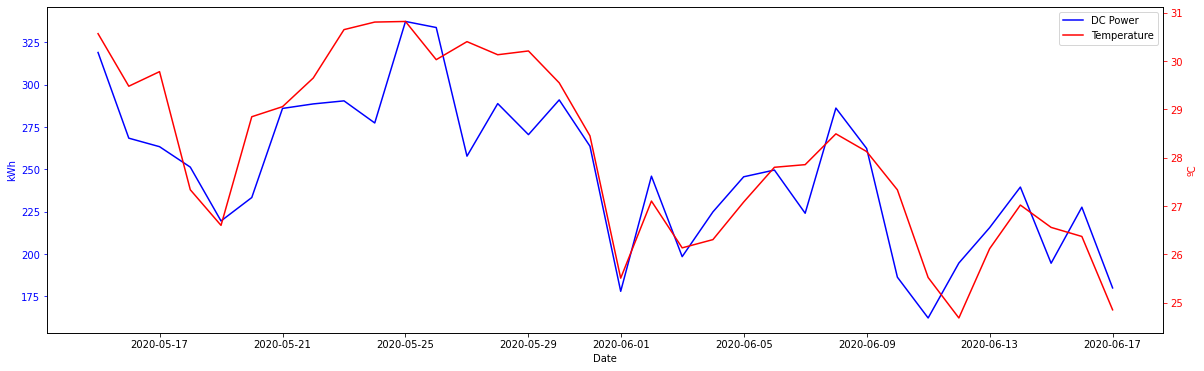

In [54]:
df1 = df.set_index('DATE_TIME')
daily_data = df1.resample('24h').mean()
display(daily_data.head(2))

fig, ax1 = plt.subplots(figsize=(20,6))
ax1.plot(daily_data.index, daily_data['DC_POWER'], 'b', label='DC Power')
ax1.set_xlabel('Date')
ax1.set_ylabel('kWh', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(daily_data.index, daily_data['AMBIENT_TEMPERATURE'], 'r', label='Temperature')
ax2.set_ylabel('ºC', color='r')
ax2.tick_params('y', colors='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')
plt.show()


In [55]:
import plotly.express as px
import plotly.graph_objs as go

dfpie = df1.groupby('SOURCE_KEY')['DAILY_YIELD'].count()
fig = px.pie(values=dfpie.values, names=dfpie.index, 
            title = 'Proportional Analysis of DAILY_YIELD with SOURCE_KEY')
fig.show()

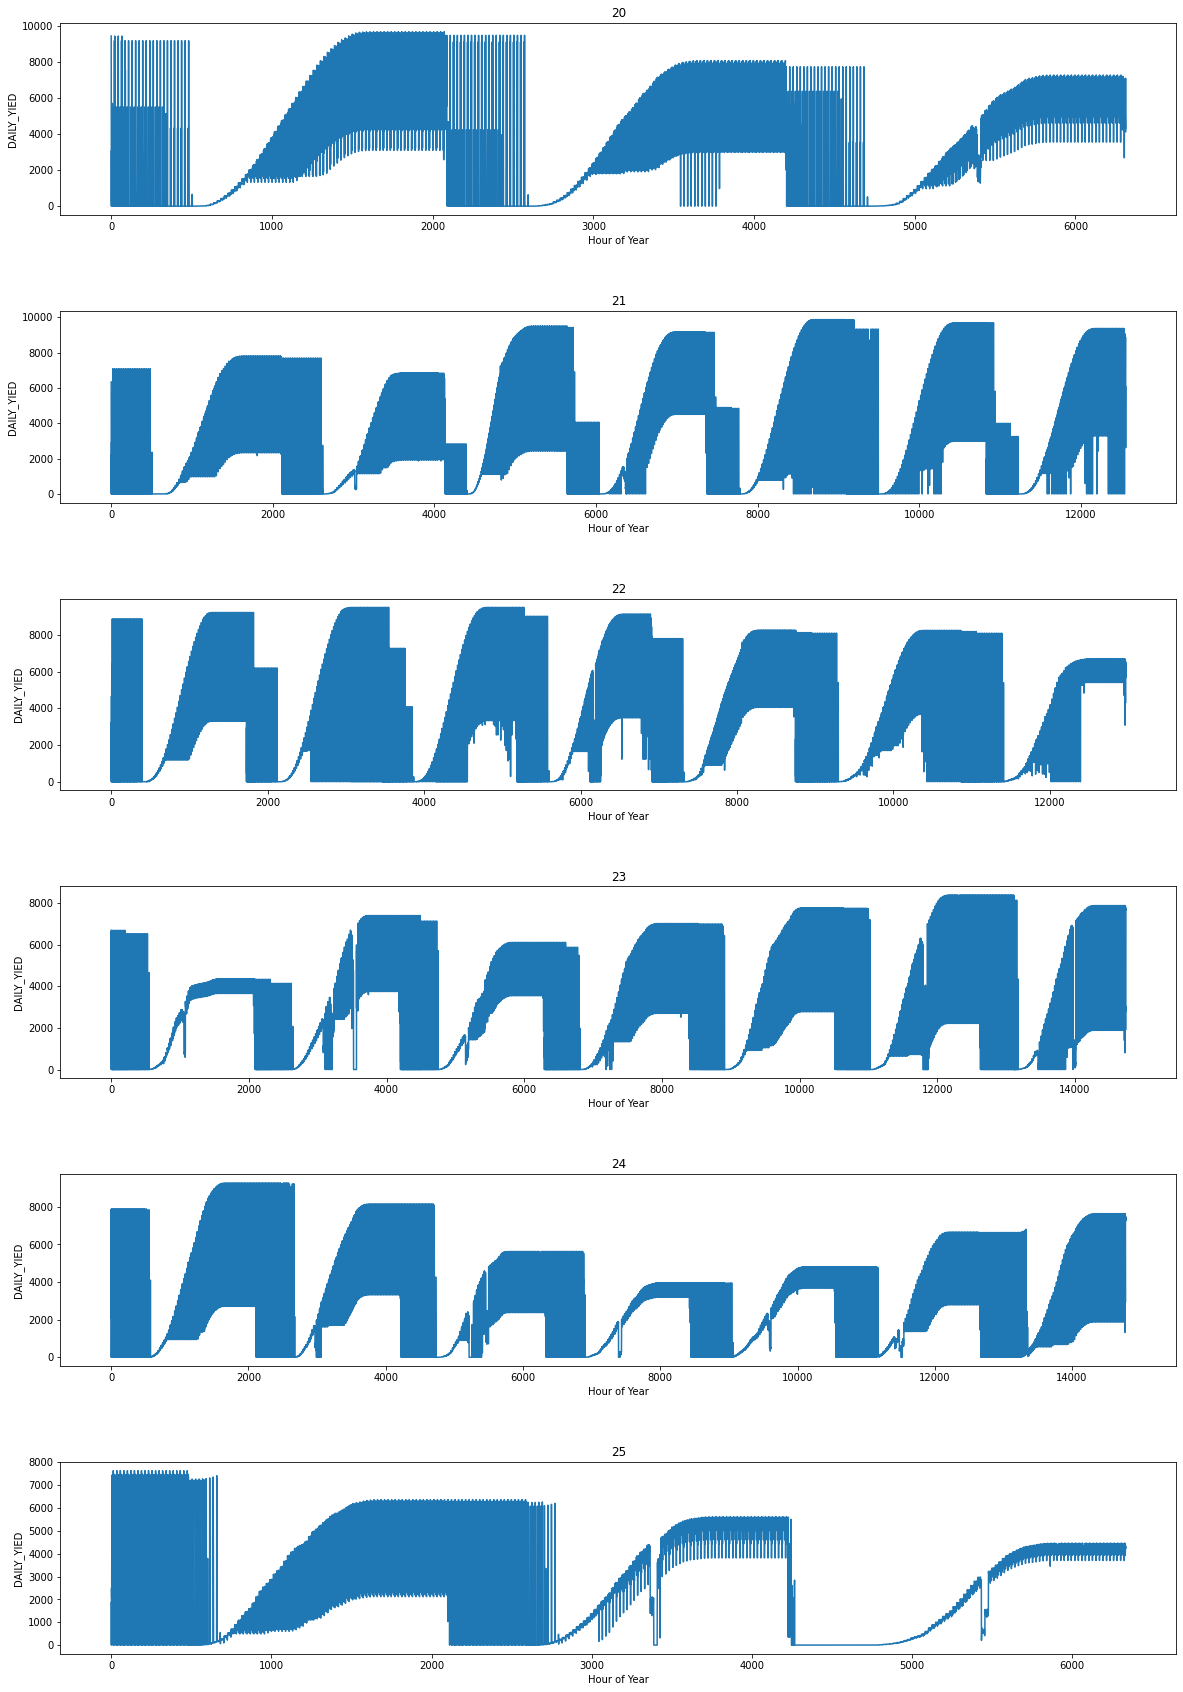

In [56]:
#group data by week
groups = df1['DAILY_YIELD'].groupby(pd.Grouper(freq='W'))

#set figure and axis
fig, axs = plt.subplots(len(groups), 1, figsize=(20,30))
for ax, (name, group) in zip(axs, groups):
    
    #plot the data
    ax.plot(pd.Series(group.values))

    ax.set_xlabel('Hour of Year')
    ax.set_ylabel('DAILY_YIED')
    ax.set_title(name.week)
    plt.subplots_adjust(hspace=0.5)

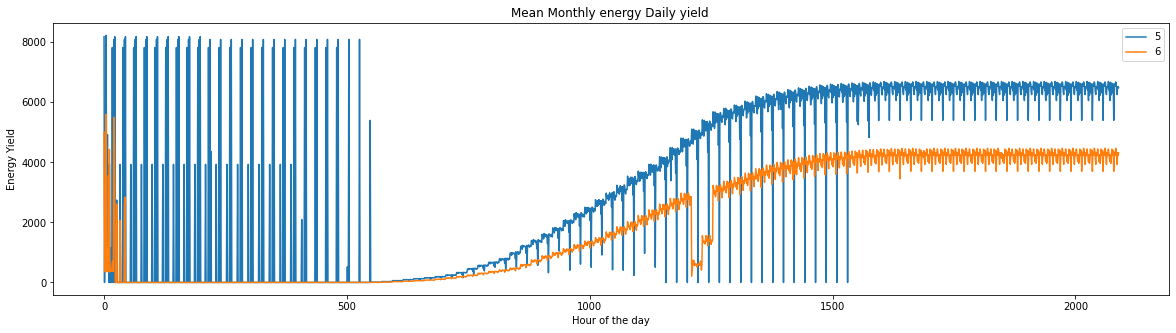

In [57]:
group_hours = df1['DAILY_YIELD'].groupby(pd.Grouper(freq='D', how='mean'))

fig, axs = plt.subplots(1,1, figsize=(20,5))

year_demands = pd.DataFrame()
    
for name, group in group_hours:
    year_demands[name.month] = pd.Series(group.values)
    
year_demands.plot(ax=axs)
axs.set_xlabel('Hour of the day')
axs.set_ylabel('Energy Yield')
axs.set_title('Mean Monthly energy Daily yield ');